In [1]:
import os
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D
import matplotlib.pyplot as plt
import librosa
from PIL import Image
import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , LeakyReLU
from keras.layers import Conv2D, Dense, Activation, Dropout, MaxPool2D, Flatten, LeakyReLU
from tensorflow.keras.regularizers import L1
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
df.head(10)

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
5,6283.jpg,MIDDLE
6,23495.jpg,YOUNG
7,7100.jpg,YOUNG
8,6028.jpg,YOUNG
9,22617.jpg,OLD


In [4]:
df['Class'] = df.Class.map({'YOUNG': 0, 'MIDDLE': 1, 'OLD': 2})

In [5]:
df.shape

(19906, 2)

In [6]:
df.head()

,ID,Class
0,377.jpg,1
1,17814.jpg,0
2,21283.jpg,1
3,16496.jpg,0
4,4487.jpg,1


In [7]:
df['ID'] = df.ID.str.split('.').str[0]

In [8]:
df.head(10)

,ID,Class
0,377,1
1,17814,0
2,21283,1
3,16496,0
4,4487,1
5,6283,1
6,23495,0
7,7100,0
8,6028,0
9,22617,2


In [9]:
df.isna().sum()

,0
ID,0
Class,0


In [10]:
df.duplicated().sum()

0

In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/faces.zip', 'r')
zip_ref.extractall('faces1/train')
zip_ref.close()

In [12]:
a = os.listdir('/content/faces1/train/faces/Train/')
len(a)

19906

In [13]:
data=[]
label=[]
i=0
for i in range(0,19906):
  img=Image.open('/content/faces1/train/faces/Train/'+a[i])
  img=img.resize((150,150))
  img=np.array(img)
  data.append(img)
  if a[i][0:5] == 'YOUNG':
    label.append(0)
  if a[i][0:6] == 'MIDDLE':
    label.append(1)
  if a[i][0:3] == 'OLD':
    label.append(2)
print('finish')

finish


In [14]:
data=np.asarray(data)
label = df['Class']
label = np.asarray(label)
label=keras.utils.to_categorical(label,num_classes=3)

print(data.shape,label.shape)

(19906, 150, 150, 3) (19906, 3)


In [15]:
YOUNG, MIDDLE, OLD =0 ,0, 0
for item in label:
  if item[0]==0:
    YOUNG +=1
  if item[1]==1:
      MIDDLE += 1
  if item[2] != 0 & 1:
      OLD += 1

print(YOUNG, MIDDLE, OLD)

13200 10804 2396


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data ,label, test_size=0.2)

In [17]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [18]:
X_train.shape

(15924, 150, 150, 3)

In [19]:
early_stop = EarlyStopping(monitor = 'accuracy', patience = 10, restore_best_weights = True)

In [20]:
model = Sequential()
model.add(Conv2D(128, [5,5], strides = [2,2], padding = 'SAME', input_shape=(150,150,3), kernel_regularizer = L1(0.01)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))

model.add(Conv2D(256, [5,5], padding = 'SAME'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))

model.add(Conv2D(256, [1,1], padding = 'SAME'))
model.add(Conv2D(256, [3,3], padding = 'SAME'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))

model.add(Conv2D(512, [1,1], padding = 'SAME'))
model.add(Conv2D(512, [3,3], padding = 'SAME',activation = 'relu'))
model.add(Conv2D(512, [1,1], padding = 'SAME'))
model.add(Conv2D(512, [3,3], padding = 'SAME', activation = 'relu'))
model.add(MaxPool2D(padding = 'SAME'))
model.add(Flatten())

model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

opt = optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer =  opt , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
history = model.fit(X_train, y_train ,batch_size= 8,epochs= 16 ,validation_data=(X_test,y_test), callbacks = [early_stop])

Epoch 1/16
1991/1991 [==============================] - 96s 45ms/step - loss: 2.1279 - accuracy: 0.5354 - val_loss: 1.4130 - val_accuracy: 0.5429
Epoch 2/16
1991/1991 [==============================] - 87s 44ms/step - loss: 1.1329 - accuracy: 0.5426 - val_loss: 0.9792 - val_accuracy: 0.5429
Epoch 3/16
1991/1991 [==============================] - 87s 44ms/step - loss: 0.9774 - accuracy: 0.5409 - val_loss: 0.9668 - val_accuracy: 0.5429
Epoch 4/16
1991/1991 [==============================] - 87s 44ms/step - loss: 0.9575 - accuracy: 0.5426 - val_loss: 0.9543 - val_accuracy: 0.5429
Epoch 5/16
1991/1991 [==============================] - 86s 43ms/step - loss: 0.9929 - accuracy: 0.5402 - val_loss: 0.9592 - val_accuracy: 0.5429
Epoch 6/16
1991/1991 [==============================] - 86s 43ms/step - loss: 0.9559 - accuracy: 0.5427 - val_loss: 0.9542 - val_accuracy: 0.5429
Epoch 7/16
1991/1991 [==============================] - 86s 43ms/step - loss: 0.9542 - accuracy: 0.5427 - val_loss: 0.9552 -

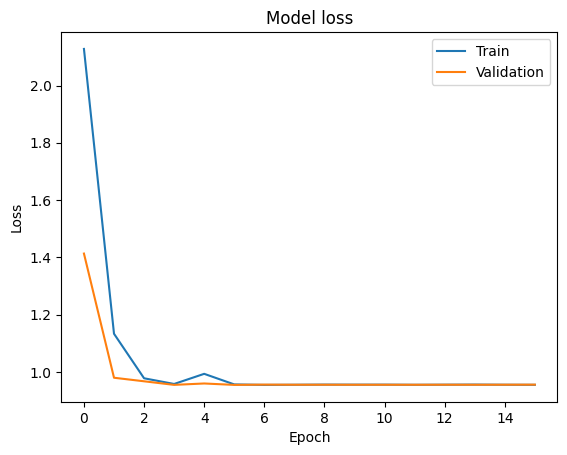

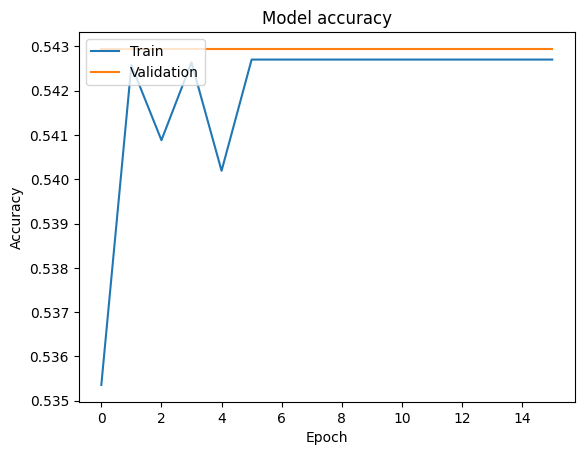

In [22]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()


def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_loss(history)
plot_accuracy(history)

125/125 [==============================] - 5s 27ms/step


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

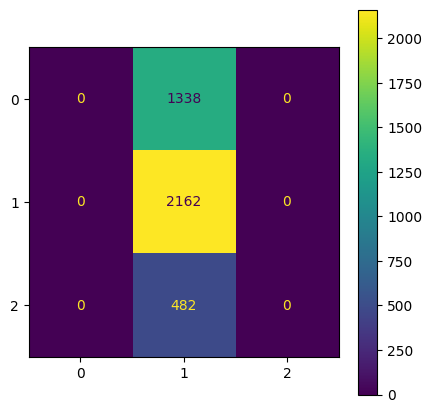

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred_probs = model.predict(X_test)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_test, axis=1)


cm = confusion_matrix(true_labels, pred_labels)
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])


fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(ax = ax)
plt.show()